In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

In [3]:
driver = webdriver.Chrome()
driver.maximize_window()
wait = WebDriverWait(driver,10)

In [4]:
def login(username,password):
    try:
        driver.get('https://www.instagram.com/')
    #     time.sleep(5)
        wait = WebDriverWait(driver,10)
        searchh = wait.until(EC.presence_of_element_located((By.NAME, 
                                          'username')))
        driver.find_element(By.NAME,'username').send_keys(username)
        pswrd_btn = driver.find_element(By.NAME,'password')
        pswrd_btn.send_keys(password)
        pswrd_btn.submit()
        print('login successful')
    except:
        print('something went wrong!')

In [5]:
login('USERNAME','Password@123')

login successful


### if save info appears:
currently i am clicking not now button

In [8]:
not_now = driver.find_element(By.XPATH,'//div[@class = "x1i10hfl xjqpnuy xa49m3k xqeqjp1 x2hbi6w xdl72j9 x2lah0s xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r x2lwn1j xeuugli x1hl2dhg xggy1nq x1ja2u2z x1t137rt x1q0g3np x1lku1pv x1a2a7pz x6s0dn4 xjyslct x1ejq31n xd10rxx x1sy0etr x17r0tee x9f619 x1ypdohk x1i0vuye xwhw2v2 xl56j7k x17ydfre x1f6kntn x2b8uid xlyipyv x87ps6o x14atkfc x1d5wrs8 x972fbf xcfux6l x1qhh985 xm0m39n xm3z3ea x1x8b98j x131883w x16mih1h xt0psk2 xt7dq6l xexx8yu x4uap5 x18d9i69 xkhd6sd x1n2onr6 xjbqb8w x1n5bzlp x173jzuc x1yc6y37"]')
not_now.click()

### if notification window appears:

In [9]:
notification = WebDriverWait(driver,10).until(EC.presence_of_element_located((By.CLASS_NAME,"_a9_1")))
notification.click()

# 1 Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.



## 1.1 From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [10]:
# handle_name ---> the name of handle you want to search, for example 'food':
# max_handles_list----> no. of handles among which you want to choose, example out of 10:
# top_among_them-----> no. of handles you want among top 10, example top 5 out of that 10 

def top_handles(handle_name, max_handles_list=10, top_among_them=5):
    try:
        dic = {}
        for i in range(max_handles_list):

            #click on search button

            home = wait.until(EC.presence_of_element_located((By.XPATH, 
                                              '//a[@class="x1i10hfl xjbqb8w x6umtig x1b1mbwd xaqea5y xav7gou x9f619 x1ypdohk xt0psk2 xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r xexx8yu x4uap5 x18d9i69 xkhd6sd x16tdsg8 x1hl2dhg xggy1nq x1a2a7pz _a6hd"]')))
            home.click()

            # wait for search button to be clickable

            time.sleep(1)
            search = wait.until(EC.presence_of_element_located((By.LINK_TEXT, 
                                              'Search')))
            search.click()


            #text box to search the given type
            search_box_text = wait.until(EC.presence_of_element_located((By.CLASS_NAME, '_aauy')))

            typed = search_box_text.send_keys(handle_name)


            #wait till loading the handles list
            searchh = wait.until(EC.presence_of_element_located((By.XPATH, 
                                              '//div/span[@class="x193iq5w xeuugli x1fj9vlw x13faqbe x1vvkbs xt0psk2 x1i0vuye xvs91rp x1s688f x5n08af x10wh9bi x1wdrske x8viiok x18hxmgj"]')))


            searchh = driver.find_elements(By.XPATH,'//div/span[@class="x193iq5w xeuugli x1fj9vlw x13faqbe x1vvkbs xt0psk2 x1i0vuye xvs91rp x1s688f x5n08af x10wh9bi x1wdrske x8viiok x18hxmgj"]')



            #check if its not a hashtag
            if (searchh[i].text == '') or (searchh[i].text[0] == '#'):
                pass


            else:
                #note the name of handle
                name = searchh[i].text

                searchh[i].click()

                #wait till follower button appears

                WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,'//a[@class="x1i10hfl xjbqb8w x6umtig x1b1mbwd xaqea5y xav7gou x9f619 x1ypdohk xt0psk2 xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r xexx8yu x4uap5 x18d9i69 xkhd6sd x16tdsg8 x1hl2dhg xggy1nq x1a2a7pz _alvs _a6hd"]')))

                #get number of followers of that handle
                follwers_link = driver.find_element(By.XPATH,'//a[@class="x1i10hfl xjbqb8w x6umtig x1b1mbwd xaqea5y xav7gou x9f619 x1ypdohk xt0psk2 xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r xexx8yu x4uap5 x18d9i69 xkhd6sd x16tdsg8 x1hl2dhg xggy1nq x1a2a7pz _alvs _a6hd"]')
                no_of_followers = follwers_link.text

                #convert 'K' into thousands and 'M' into million
                if no_of_followers.split(' ')[0][-1] =='K':
                    no_of_followers = int(float(no_of_followers.split(' ')[0][:-1])*1000)

                elif no_of_followers.split(' ')[0][-1] =='M':
                    no_of_followers = int(float(no_of_followers.split(' ')[0][:-1])*1000000)

                else:
                    no_of_followers = int(no_of_followers.split(' ')[0])

                dic[name] = no_of_followers

                print(name,no_of_followers)

        # give space between top 10 handles list and highest followers list:
        print()        
        # find the top 5 followes 

        top_5_followers = sorted(dic.items(), key=lambda kv:(kv[1], kv[0]),reverse = True)[:5]
        for i in range(top_among_them):
            print(i+1,"|",top_5_followers[i][0],"|",top_5_followers[i][1])
            
        return top_5_followers

    except:
        print('something went wrong!')

In [11]:
# i made this for my convienience not to search profile again and again
def search_profile(profile_name):
    try:
        driver.get('https://www.instagram.com/')
        #click on search button
        driver.find_element(By.LINK_TEXT, 'Search').click()
        # type in searchbox
        search_box_text = driver.find_element(By.CLASS_NAME, '_aauy')
        typed = search_box_text.send_keys(profile_name)

        wait = WebDriverWait(driver, 10)
        searchh = wait.until(EC.presence_of_element_located((By.XPATH, 
                                          '//div/span[@class="x193iq5w xeuugli x1fj9vlw x13faqbe x1vvkbs xt0psk2 x1i0vuye xvs91rp x1s688f x5n08af x10wh9bi x1wdrske x8viiok x18hxmgj"]')))


        # find path for the list of handles
        searchh = driver.find_elements(By.XPATH,'//div/span[@class="x193iq5w xeuugli x1fj9vlw x13faqbe x1vvkbs xt0psk2 x1i0vuye xvs91rp x1s688f x5n08af x10wh9bi x1wdrske x8viiok x18hxmgj"]')
        # choose the top handle name , i.e best match to provided handle
        searchh[0].click()
        print('profile visited on instagram')
    except:
        print('something went wrong!')

In [12]:
# i am also printing 10 followers here and storing value of top 5 into variable

top_5_followers = top_handles('food',10,5)
print(top_5_followers)

foodtalkindia 309000
fun2ooshfood 128000
foodporn 1000000
delhi_streets_food 42000
tasty.foodrecipes 17100
food.finista 14300
food 182000
yourfoodlab 2600000
foodpandaindia 28600

1 | yourfoodlab | 2600000
2 | foodporn | 1000000
3 | foodtalkindia | 309000
4 | food | 182000
5 | fun2ooshfood | 128000
[('yourfoodlab', 2600000), ('foodporn', 1000000), ('foodtalkindia', 309000), ('food', 182000), ('fun2ooshfood', 128000)]


In [13]:
top_5_followers

[('yourfoodlab', 2600000),
 ('foodporn', 1000000),
 ('foodtalkindia', 309000),
 ('food', 182000),
 ('fun2ooshfood', 128000)]

## 1.2 Now Find the number of posts these handles have done in the previous 3 days

In [17]:
# handles_names ---> pass the top_handles or can individually pas handle name in form of tuple of list, ex [('foodieindia')]
# days---- > no. of days you want to extract information, (days can be only less than 6)
def no_of_post(handles_names, days=3):
    try:
        d = {}
        for i in top_5_followers:
            name = i[0]
            search_profile(name)
            count = 0
            i = 0
            WebDriverWait(driver,5).until(EC.presence_of_element_located((By.XPATH,"//div[@class = '_aagw']")))
            
            time.sleep(4)
            posts_links = driver.find_elements(By.XPATH,"//div[@class = '_aagw']")

            posts_links[0].click()

            while True:

                WebDriverWait(driver,5).until(EC.presence_of_element_located((By.CLASS_NAME,"_aaqe")))

                # check the post time 
                post_time = driver.find_element(By.CLASS_NAME,"_aaqe")

                upload_time = post_time.get_attribute("innerHTML").split()
                # check if 3 days are present 

                try:

                    if len(upload_time) ==3:


                        if upload_time[1] == "hours" or upload_time[1] =="hour" or upload_time[1] == "minutes" or upload_time[1] == "minute" or upload_time[1] == "seconds":
                            count +=1

                        elif int(upload_time[0]) <= days:
                            count+=1

                        else:

                            break
                    else:

                        break
                    # click on next post
                    next_button = driver.find_element(By.XPATH,'//div[contains(@class,"_aaqg")]')
                    next_button.click()

                    i+=1
                except:
                    break
            driver.back()
            d[name] = count
    except:
        print('something went wrong!')
        
    return d

In [18]:
#here i am finding no. of post of top 5 followers and storing that data into variable d , this function returns a dictionary
d = no_of_post(top_5_followers)
print(d)

profile visited on instagram
profile visited on instagram
profile visited on instagram
profile visited on instagram
profile visited on instagram
{'yourfoodlab': 4, 'foodporn': 1, 'foodtalkindia': 4, 'food': 4, 'fun2ooshfood': 3}


In [19]:
d

{'yourfoodlab': 4,
 'foodporn': 1,
 'foodtalkindia': 4,
 'food': 4,
 'fun2ooshfood': 3}

## 1.3 Depict this information using a suitable graph.

In [20]:

def plot_bar_chart(dictionary):
    import matplotlib.pyplot as plt

    # extracte handle name and post
    name = dictionary.keys()
    post_no = dictionary.values()

    # ploting bar graph for better visualization 
    plt.figure(num=None, figsize=(5, 4), dpi=100, facecolor='w', edgecolor='green')
    plt.bar(name,post_no,color = 'green')
    plt.title('Top 5 Food Insta Handles v/s Number of posts previous 3 days',color = "b")
    plt.xlabel("Food Instagram Handel Name",color = "m")
    plt.ylabel("No. of Posts in 3 days",color = "m")
    plt.grid()
    plt.xticks(rotation = 20)
    return plt.show()

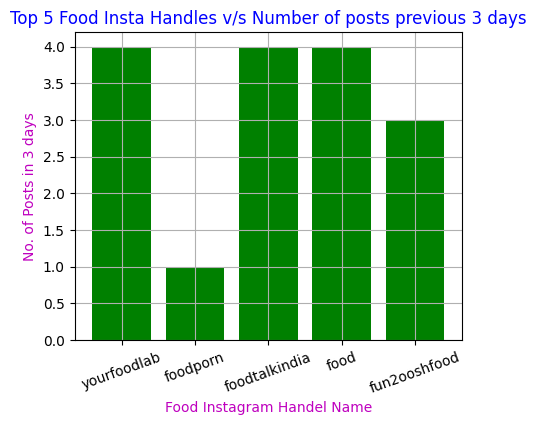

In [21]:
plot_bar_chart(d)

# 2 Your friend also needs a list of hashtags that he should use in his posts.


## Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [ ]:
def words_list(top_5_followers):
    lis = []

    for i in top_5_followers:
        name = i[0]
        search_profile(name)


    
        WebDriverWait(driver,10).until(EC.presence_of_element_located((By.XPATH,"//div[@class = '_aagw']")))
        time.sleep(3)
        posts_links = driver.find_elements(By.XPATH,"//div[@class = '_aagw']")


        posts_links[0].click()

        for i in range(10):

            try:
                post_data = WebDriverWait(driver,5).until(EC.presence_of_element_located((By.XPATH,'//h1[@class = "_aacl _aaco _aacu _aacx _aad7 _aade"]')))
                post_data = driver.find_element(By.XPATH,'//h1[@class = "_aacl _aaco _aacu _aacx _aad7 _aade"]')


                keywords = post_data.text.split(' ')
                for string in keywords:
                    lis.append(string)
                next_button = driver.find_element(By.XPATH,'//div[contains(@class,"_aaqg")]')
                next_button.click()
            except:
                next_button = driver.find_element(By.XPATH,'//div[contains(@class,"_aaqg")]')
                next_button.click()

        driver.back()
    return lis

In [28]:
lis = words_list(top_5_followers)

profile visited on instagram
profile visited on instagram
profile visited on instagram
profile visited on instagram
profile visited on instagram


## 2.2 Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [29]:
lis

['Gujarati',
 'special',
 'recipe',
 'Khandvi',
 '😍✨',
 'Super',
 'quick',
 'and',
 'easy',
 'recipe',
 'which',
 'turns',
 'out',
 'absolutely',
 'delicious',
 '❤️\nCheck',
 'out',
 'the',
 'full',
 'recipe',
 'on',
 'my',
 'YouTube',
 'channel!',
 'Cheers',
 '🥂\n\n#yourfoodlab',
 '#sanjyotkeer',
 '#foodporn',
 '#khandvi',
 '#instagram',
 'Hey',
 'pizza',
 'aficionados,',
 'have',
 'we',
 'got',
 'a',
 'treat',
 'for',
 'you!',
 'We’re',
 'in',
 'Napoli,',
 'the',
 'home',
 'of',
 'pizza,',
 'and',
 'we’re',
 'at',
 '@sorbillo',
 'who',
 'is',
 'the',
 'godfather',
 'of',
 'them',
 'all.',
 '🍕🤌\nWe',
 'ordered',
 'a',
 'Margheritta',
 'Bufula',
 'D.O.P,',
 'which',
 'cost',
 '€8.50',
 '(about',
 'USD',
 '$9.30).\nLike',
 'all',
 'good',
 'Napoli',
 'pizzas,',
 'it’s',
 'cooked',
 'for',
 'a',
 'very',
 'short',
 'time',
 'and',
 'the',
 'bottom',
 'has',
 'a',
 'soft,',
 'almost',
 'squishy',
 'texture.',
 '💦🔥\nIt’s',
 'a',
 'damn',
 'good',
 'pizza,',
 'and',
 'we',
 'think',
 '@mich

## 2.3 Create a csv file with two columns : the word and its frequency

In [30]:
def frequency(lis):
    word_frequency = {}
    hashtag_frequency = {}
    for word in lis:

        if word.isalpha() == True:
            word_frequency[word] = word_frequency.get(word,0)+1
        elif word[0] == "#":
            hashtag_frequency[word] = hashtag_frequency.get(word,0)+1

    return word_frequency, hashtag_frequency

In [31]:
word_frequency,hashtag_frequency = frequency(lis)

In [32]:
hashtag_frequency

{'#sanjyotkeer': 1,
 '#foodporn': 2,
 '#khandvi': 1,
 '#instagram': 1,
 '#FOODPORN': 1,
 '#GetYourMindOutOfTheGutter': 1,
 '#nyc': 2,
 '#newyorkfood': 1,
 '#nycfood': 1,
 '#foodie': 1,
 '#nycfoodie': 1,
 '#friedfood': 1,
 '#food': 16,
 '#meat': 1,
 '#bbq': 1,
 '#smokedmeat': 1,
 '#barbecue': 1,
 '#barbeque': 1,
 '#smoker': 1,
 '#ramen': 1,
 '#naruto': 1,
 '#anime': 1,
 '#ramenbowl': 1,
 '#chaat': 2,
 '#bhandar': 2,
 '#streetsnacks': 2,
 '#foodtalkindia': 20,
 '#foodiesofindia': 20,
 '#foodblogger': 18,
 '#delicious': 18,
 '#yummy': 20,
 '#instafood': 20,
 '#discover': 20,
 '#beers': 2,
 '#brewery': 2,
 '#eid': 2,
 '#feast': 2,
 '#phirni': 2,
 '#biryani': 2,
 '#kebabs': 2,
 '#middleastern': 2,
 '#deliverykitchen': 2,
 '#coffee': 2,
 '#cafe': 2,
 '#mumbai': 2,
 '#caffeine': 2,
 '#drinks': 2,
 '#anthem': 2,
 '#agency': 2,
 '#momos': 2,
 '#frozenfood': 2,
 '#brands': 2,
 '#Indian': 2,
 '#Japanese': 2,
 '#restaurant': 2,
 '#pokebowls': 2,
 '#flavours': 2,
 '#foodguide': 2,
 '#guide': 2,
 '#

In [53]:
def words_list_csv(word_frequency):
    # convert word dictionary in to list for data-frame 
    word_list = sorted(word_frequency.items(), key=lambda kv:(kv[1], kv[0]))

    # use pandas dataframe 
    import pandas as pd
    df = pd.DataFrame(word_list, columns=['Word', 'frequency'])

    # creat a csv file using to_csv
    df.to_csv('words_and_frequency_insta_hashtag.csv', index = False )
    return df

In [55]:
words_list_csv(word_frequency)

,Word,frequency
0,Bada,1
1,Bake,1
2,Bay,1
3,Beef,1
4,Best,1
...,...,...
457,your,21
458,of,31
459,to,34
460,and,62


## 2.4 Now, find the hashtags that were most popular among these bloggers
.

In [34]:
# hashtags with frequency is already stored in hashtag_frequency so i will use that as input
def top_5_hashtag(hashtag_frequency):

    sorted_hashtags = sorted(hashtag_frequency.items(), key=lambda kv:(kv[1], kv[0]),reverse=True)

    top_5_hashtags_list = sorted_hashtags[:5]
    top_5_hashtags_dict = dict(top_5_hashtags_list)

    hashtag_name = top_5_hashtags_dict.keys()
    hashtag_frequency = top_5_hashtags_dict.values()
    
    return hashtag_name, hashtag_frequency

In [35]:
hashtag_name, hashtag_frequency = top_5_hashtag(hashtag_frequency)

In [36]:
hashtag_name, hashtag_frequency

(dict_keys(['#yummy', '#instafood', '#foodtalkindia', '#foodiesofindia', '#discover']),
 dict_values([20, 20, 20, 20, 20]))

## 2.5 Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts

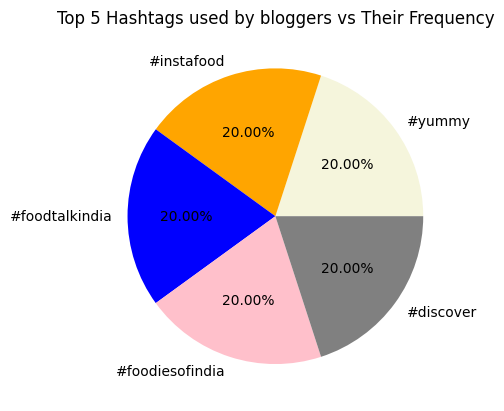

In [37]:
import matplotlib.pyplot as plt

# plot the pie chart
color = ["beige", "orange", "blue", "pink", "grey"]
plt.pie(hashtag_frequency,labels = hashtag_name, colors = color, autopct = "%.2f%%")
plt.title("Top 5 Hashtags used by bloggers vs Their Frequency")
plt.axis()
plt.show()

# You need to also calculate average followers : likes ratio for the obtained handles.


## 3.1 Followers : Likes ratio is calculated as follows:
Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [48]:
# i am making a dictionary which would contain handle name and likes on 10 post of that handle

di = {}
for i in top_5_followers:
    name = i[0]
    search_profile(i[0])
    # click on 1st post
    WebDriverWait(driver,5).until(EC.presence_of_element_located((By.XPATH,"//div[@class = '_aagw']")))
    time.sleep(3)
    posts_links = driver.find_elements(By.XPATH,"//div[@class = '_aagw']")
    time.sleep(1)
    posts_links[0].click()
    total_like = 0  
    count = 1
    while count <=10:

        # if number of likes is present 
        try:
            # if number of likes is present 
            post_content = WebDriverWait(driver, 15).until(EC.presence_of_element_located((By.XPATH,'//section[@class = "_ae5m _ae5n _ae5o"]')))

            # if like more than 999
            try:
                a = post_content.text.split()[0].split(",")
                post_like = int(a[0]+a[1])    
            except IndexError :
                a = post_content.text.split()[0]
                post_like = int(a)
            
            total_like += post_like
            count +=1
            # click on next post 
            next_button = driver.find_element(By.XPATH,'//div[contains(@class,"_aaqg")]')
            next_button.click()


        #  if number of likes is not present we check next post 
        except ValueError:
            next_button = driver.find_element(By.XPATH,'//div[contains(@class,"_aaqg")]')
            next_button.click()
 
    di[name] = total_like
    driver.back()

    

profile visited on instagram
profile visited on instagram
profile visited on instagram
profile visited on instagram
profile visited on instagram


In [49]:
di

{'yourfoodlab': 203600,
 'foodporn': 644651,
 'foodtalkindia': 5534,
 'food': 5534,
 'fun2ooshfood': 70780}

## 3.2 Calculate the average likes for a handle.


In [50]:
# find avgerage like for a insta handle
avg_like = {}
a = 1
for i in di:
    print(a,'|',i,'|',"avg likes-",di[i]/10)
    avg_like[i] = d[i]/10
    a +=1

1 | yourfoodlab | avg likes- 20360.0
2 | foodporn | avg likes- 64465.1
3 | foodtalkindia | avg likes- 553.4
4 | food | avg likes- 553.4
5 | fun2ooshfood | avg likes- 7078.0


## 3.3 Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.


In [51]:
# like ratio
like_ratio = []
insta_name = []
a = 1
for i in top_5_followers:
    name = i[0]
    followers  = i[1]
    lr = followers/avg_like[name]
    print(a," | ",name, " | ",lr)
    like_ratio.append(lr)
    insta_name.append(name)
    a+=1

1  |  yourfoodlab  |  6500000.0
2  |  foodporn  |  10000000.0
3  |  foodtalkindia  |  772500.0
4  |  food  |  455000.0
5  |  fun2ooshfood  |  426666.6666666667


## 3.4 Create a bar graph to depict the above obtained information.


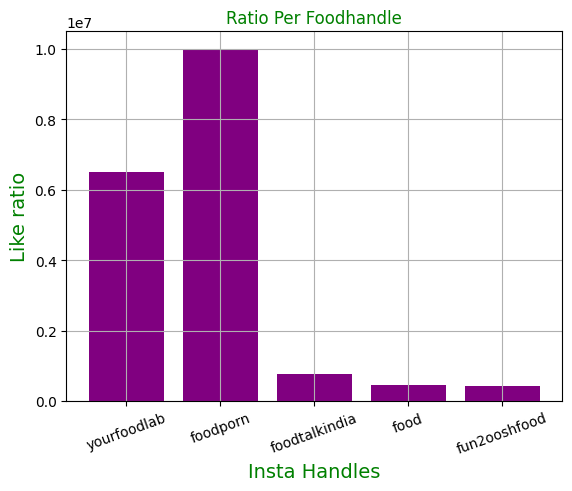

In [52]:
# for creating bar graph

plt.bar(insta_name,like_ratio,color = "purple")
plt.xlabel("Insta Handles",fontsize=14,color = "g")
plt.ylabel("Like ratio",fontsize=14,color = "g")
plt.xticks(rotation = 20)
plt.title("Ratio Per Foodhandle",color = "g")
plt.grid()
plt.show()